In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.models import Model
from keras.layers import Input, Dense

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving data10000.csv to data10000.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['All_BandGap_10000.csv']))

In [ ]:
df

,c2,s,BandGap1,BandGap2,BandGap3,BandGap4,BandGap5,BandGap6,BandGap7
0,0.15,0.01,3.255800e-02,6.521200e-02,9.809400e-02,1.312800e-01,1.649700e-01,1.992100e-01,2.343600e-01
1,0.30,0.01,2.749700e-02,5.505700e-02,8.275700e-02,1.106600e-01,1.388600e-01,1.674200e-01,1.965300e-01
2,0.45,0.01,2.075500e-02,4.153700e-02,6.238000e-02,8.331000e-02,1.043700e-01,1.256000e-01,1.470500e-01
3,0.60,0.01,1.433700e-02,2.868200e-02,4.304300e-02,5.742800e-02,7.185100e-02,8.631700e-02,1.008500e-01
4,0.75,0.01,8.508700e-03,1.701600e-02,2.552200e-02,3.402400e-02,4.252300e-02,5.101800e-02,5.951300e-02
...,...,...,...,...,...,...,...,...,...
9995,14.40,1.00,1.780000e-14,1.240000e-14,1.950000e-14,1.600000e-14,1.070000e-14,3.550000e-15,1.780000e-14
9996,14.55,1.00,1.820000e-14,1.510000e-14,1.950000e-14,5.330000e-15,1.070000e-14,3.550000e-15,2.490000e-14
9997,14.70,1.00,3.110000e-14,3.640000e-14,3.550000e-15,1.950000e-14,1.420000e-14,3.550000e-15,3.550000e-15
9998,14.85,1.00,2.180000e-14,4.170000e-14,1.600000e-14,1.950000e-14,1.780000e-15,1.070000e-14,2.130000e-14


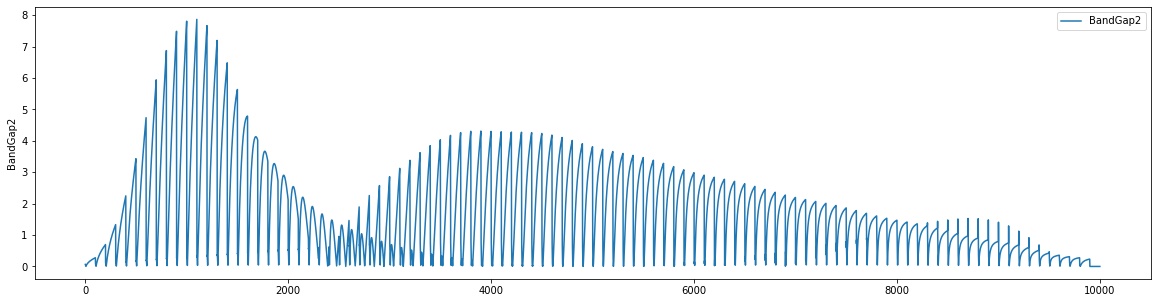

In [ ]:
df.plot(y='BandGap2', figsize=(20, 5))
plt.ylabel('BandGap2')
plt.show()

In [ ]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

# x_trainではcsvファイルの1行目から2行目を，y_trainでは3〜8行目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2,3,4,5,6,7,8]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2,3,4,5,6,7,8]]

In [ ]:
# データの標準化

x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [ ]:
# モデルの構築
# inputの数:c2, s
inputs = Input(shape=(2,))

x1 = Dense(64, activation='relu')(inputs)
x2 = Dense(64, activation='relu')(x1)
x3 = Dense(64, activation='relu')(x2)
x4 = Dense(64, activation='relu')(x3)
x5 = Dense(64, activation='relu')(x4)
x6 = Dense(64, activation='relu')(x5)
x7 = Dense(64, activation='relu')(x6)
x8 = Dense(64, activation='relu')(x7)
x9 = Dense(64, activation='relu')(x8)
x10 = Dense(64, activation='relu')(x9)

BandGap1 = Dense(64, activation='relu')(x10)
output1 = Dense(1, name='output1')(BandGap1)

BandGap2 = Dense(64, activation='relu')(x10)
output2 = Dense(1, name='output2')(BandGap2)

BandGap3 = Dense(64, activation='relu')(x10)
output3 = Dense(1, name='output3')(BandGap3)

BandGap4 = Dense(64, activation='relu')(x10)
output4 = Dense(1, name='output4')(BandGap4)

BandGap5 = Dense(64, activation='relu')(x10)
output5 = Dense(1, name='output5')(BandGap5)

BandGap6 = Dense(64, activation='relu')(x10)
output6 = Dense(1, name='output6')(BandGap6)

BandGap7 = Dense(64, activation='relu')(x10)
output7 = Dense(1, name='output7')(BandGap7)

model = Model(inputs=inputs, outputs=[output1, output2, output3, output4, output5, output6, output7])

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(
    optimizer=optimizer,
    loss=['mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse']
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# 学習回数
epochs = 150
batch_size = 64

# 学習オプション
history = model.fit(x_train, 
                    y = {"output1":y_train.iloc[:, [0]], "output2":y_train.iloc[:, [1]], "output3":y_train.iloc[:, [2]], "output4":y_train.iloc[:, [3]], "output5":y_train.iloc[:, [4]], "output6":y_train.iloc[:, [5]], "output7":y_train.iloc[:, [6]]},
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(x_test, {"output1":y_test.iloc[:, [0]], "output2":y_test.iloc[:, [1]], "output3":y_test.iloc[:, [2]], "output4":y_test.iloc[:, [3]], "output5":y_test.iloc[:, [4]], "output6":y_test.iloc[:, [5]], "output7":y_test.iloc[:, [6]]})
)

Epoch 1/150
125/125 [==============================] - 4s 11ms/step - loss: 11.7707 - output1_loss: 1.6660 - output2_loss: 1.7284 - output3_loss: 1.6498 - output4_loss: 1.7921 - output5_loss: 1.6286 - output6_loss: 1.6792 - output7_loss: 1.6266 - val_loss: 6.9172 - val_output1_loss: 0.6840 - val_output2_loss: 1.1137 - val_output3_loss: 0.9913 - val_output4_loss: 1.0716 - val_output5_loss: 0.9907 - val_output6_loss: 1.0593 - val_output7_loss: 1.0066
Epoch 2/150
125/125 [==============================] - 1s 7ms/step - loss: 6.3273 - output1_loss: 0.5608 - output2_loss: 0.8934 - output3_loss: 0.9781 - output4_loss: 0.9690 - output5_loss: 0.9671 - output6_loss: 0.9949 - output7_loss: 0.9641 - val_loss: 5.9540 - val_output1_loss: 0.4519 - val_output2_loss: 0.8290 - val_output3_loss: 0.8127 - val_output4_loss: 0.9577 - val_output5_loss: 0.9129 - val_output6_loss: 0.9994 - val_output7_loss: 0.9903
Epoch 3/150
125/125 [==============================] - 1s 6ms/step - loss: 5.2164 - output1_loss

In [ ]:
pred1, pred2, pred3, pred4, pred5, pred6, pred7 = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


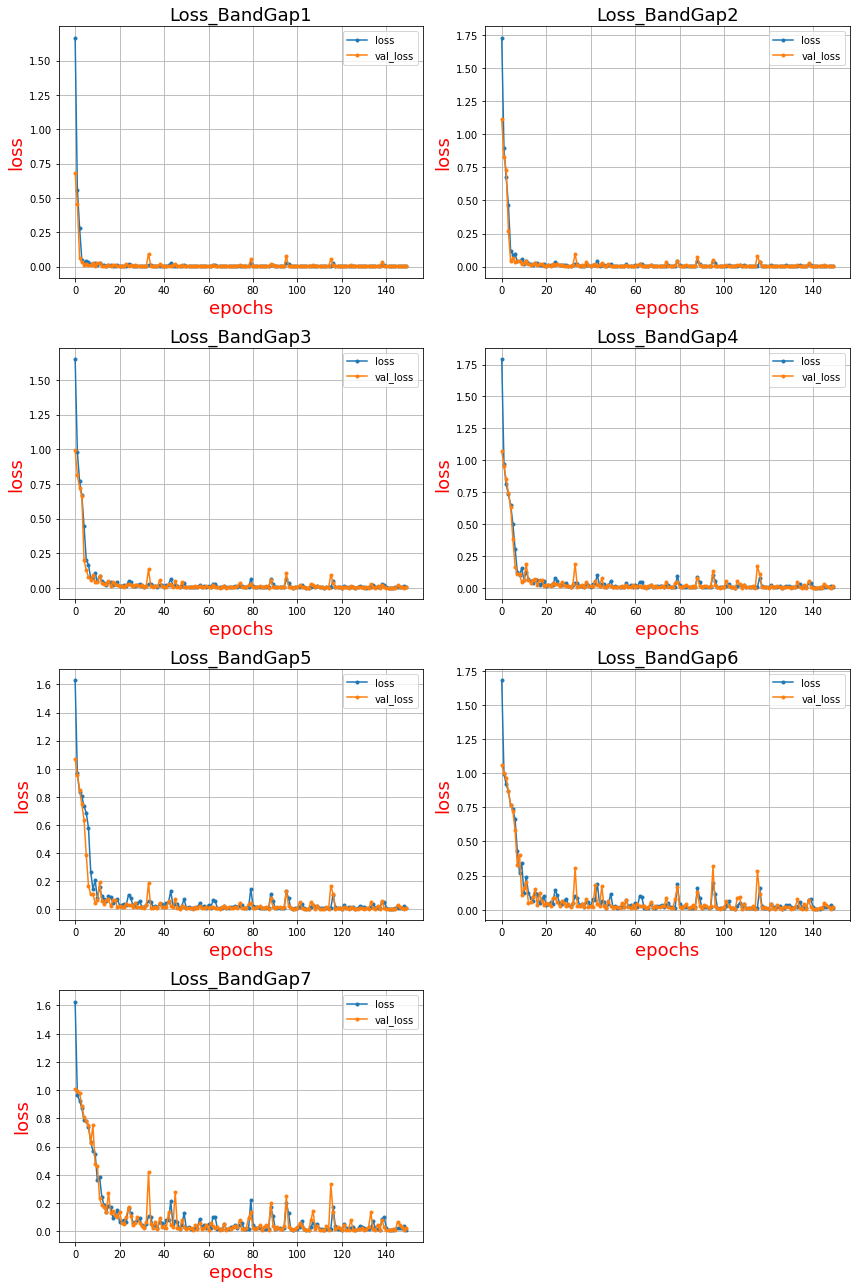

In [ ]:
# Figureを追加
fig = plt.figure(figsize = (12, 18))

# BandGap1 ====================================================================
# 2×4 の1枚目に描画する
loss_graph1 = fig.add_subplot(4, 2, 1)

# x,yに要素追加
loss1 = history.history['output1_loss']
val_loss1 = history.history['val_output1_loss']
epochs1 = len(loss1)

# グラフ設定
loss_graph1.plot(range(epochs), loss1, marker='.', label='loss')
loss_graph1.plot(range(epochs), val_loss1, marker='.', label='val_loss')
loss_graph1.set_title("Loss_BandGap1", size = 18)
loss_graph1.legend(loc='best')
loss_graph1.grid()
loss_graph1.set_xlabel("epochs", size = 18, color = "r")
loss_graph1.set_ylabel("loss", size = 18, color = "r")

#==============================================================================
# BandGap2 ====================================================================
# 2×4 の2枚目に描画する
loss_graph2 = fig.add_subplot(4, 2, 2)

# x,yに要素追加
loss2 = history.history['output2_loss']
val_loss2 = history.history['val_output2_loss']
epochs2 = len(loss2)

# グラフ設定
loss_graph2.plot(range(epochs), loss2, marker='.', label='loss')
loss_graph2.plot(range(epochs), val_loss2, marker='.', label='val_loss')
loss_graph2.set_title("Loss_BandGap2", size = 18)
loss_graph2.legend(loc='best')
loss_graph2.grid()
loss_graph2.set_xlabel("epochs", size = 18, color = "r")
loss_graph2.set_ylabel("loss", size = 18, color = "r")
#==============================================================================
#==============================================================================
# BandGap3 ====================================================================
# 2×4 の3枚目に描画する
loss_graph3 = fig.add_subplot(4, 2, 3)

# x,yに要素追加
loss3 = history.history['output3_loss']
val_loss3 = history.history['val_output3_loss']
epochs3 = len(loss3)

# グラフ設定
loss_graph3.plot(range(epochs), loss3, marker='.', label='loss')
loss_graph3.plot(range(epochs), val_loss3, marker='.', label='val_loss')
loss_graph3.set_title("Loss_BandGap3", size = 18)
loss_graph3.legend(loc='best')
loss_graph3.grid()
loss_graph3.set_xlabel("epochs", size = 18, color = "r")
loss_graph3.set_ylabel("loss", size = 18, color = "r")
#==============================================================================
#==============================================================================
# BandGap4 ====================================================================
# 2×4 の4枚目に描画する
loss_graph4 = fig.add_subplot(4, 2, 4)

# x,yに要素追加
loss4 = history.history['output4_loss']
val_loss4 = history.history['val_output4_loss']
epochs4 = len(loss4)

# グラフ設定
loss_graph4.plot(range(epochs), loss4, marker='.', label='loss')
loss_graph4.plot(range(epochs), val_loss4, marker='.', label='val_loss')
loss_graph4.set_title("Loss_BandGap4", size = 18)
loss_graph4.legend(loc='best')
loss_graph4.grid()
loss_graph4.set_xlabel("epochs", size = 18, color = "r")
loss_graph4.set_ylabel("loss", size = 18, color = "r")
#==============================================================================
# BandGap5 ====================================================================
# 2×4 の5枚目に描画する
loss_graph5 = fig.add_subplot(4, 2, 5)

# x,yに要素追加
loss5 = history.history['output5_loss']
val_loss5 = history.history['val_output4_loss']
epochs5 = len(loss5)

# グラフ設定
loss_graph5.plot(range(epochs), loss5, marker='.', label='loss')
loss_graph5.plot(range(epochs), val_loss5, marker='.', label='val_loss')
loss_graph5.set_title("Loss_BandGap5", size = 18)
loss_graph5.legend(loc='best')
loss_graph5.grid()
loss_graph5.set_xlabel("epochs", size = 18, color = "r")
loss_graph5.set_ylabel("loss", size = 18, color = "r")
#==============================================================================
# BandGap6 ====================================================================
# 2×4 の6枚目に描画する
loss_graph6 = fig.add_subplot(4, 2, 6)

# x,yに要素追加
loss6 = history.history['output6_loss']
val_loss6 = history.history['val_output6_loss']
epochs6 = len(loss6)

# グラフ設定
loss_graph6.plot(range(epochs), loss6, marker='.', label='loss')
loss_graph6.plot(range(epochs), val_loss6, marker='.', label='val_loss')
loss_graph6.set_title("Loss_BandGap6", size = 18)
loss_graph6.legend(loc='best')
loss_graph6.grid()
loss_graph6.set_xlabel("epochs", size = 18, color = "r")
loss_graph6.set_ylabel("loss", size = 18, color = "r")
#==============================================================================
# BandGap7 ====================================================================
# 2×4 の7枚目に描画する
loss_graph7 = fig.add_subplot(4, 2, 7)

# x,yに要素追加
loss7 = history.history['output7_loss']
val_loss7 = history.history['val_output7_loss']
epochs7 = len(loss6)

# グラフ設定
loss_graph7.plot(range(epochs), loss7, marker='.', label='loss')
loss_graph7.plot(range(epochs), val_loss7, marker='.', label='val_loss')
loss_graph7.set_title("Loss_BandGap7", size = 18)
loss_graph7.legend(loc='best')
loss_graph7.grid()
loss_graph7.set_xlabel("epochs", size = 18, color = "r")
loss_graph7.set_ylabel("loss", size = 18, color = "r")
#==============================================================================

plt.tight_layout()
plt.show()

In [ ]:
# BandGap1 ====================================================================
print("=======  BandGap1  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 0], pred1)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 0], pred1))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 0], pred1)
print('R2：', R2)

print("")

# BandGap2 ====================================================================
print("=======  BandGap2  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 1], pred2)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 1], pred2))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 1], pred2)
print('R2：', R2)

print("")

# BandGap3 ====================================================================
print("=======  BandGap3  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 2], pred3)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 2], pred3))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 2], pred3)
print('R2：', R2)

print("")

# BandGap4 ====================================================================
print("=======  BandGap4  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 3], pred4)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 3], pred4))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 3], pred4)
print('R2：', R2)

print("")

# BandGap5 ====================================================================
print("=======  BandGap5  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 4], pred5)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 4], pred5))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 4], pred5)
print('R2：', R2)

print("")

# BandGap6 ====================================================================
print("=======  BandGap6  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 5], pred6)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 5], pred6))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 5], pred6)
print('R2：', R2)

print("")

# BandGap7 ====================================================================
print("=======  BandGap7  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 6], pred7)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 6], pred7))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 6], pred7)
print('R2：', R2)

print("")

=======  BandGap1  =======
MAE： 0.03722572634648951
RMSE： 0.04574467864250016
R2： 0.9991624268883992

=======  BandGap2  =======
MAE： 0.04942292217855802
RMSE： 0.06195475225475355
R2： 0.9981505502775835

=======  BandGap3  =======
MAE： 0.05423334974936523
RMSE： 0.07051607871270921
R2： 0.9977009636999221

=======  BandGap4  =======
MAE： 0.08900653073385643
RMSE： 0.11213571119466828
R2： 0.9937345763472392

=======  BandGap5  =======
MAE： 0.09582208924845596
RMSE： 0.12259389885762846
R2： 0.9930097131304761

=======  BandGap6  =======
MAE： 0.10250116938777026
RMSE： 0.13710526754556884
R2： 0.9915885502054415

=======  BandGap7  =======
MAE： 0.10083891360128609
RMSE： 0.138443930449433
R2： 0.9921032376559488



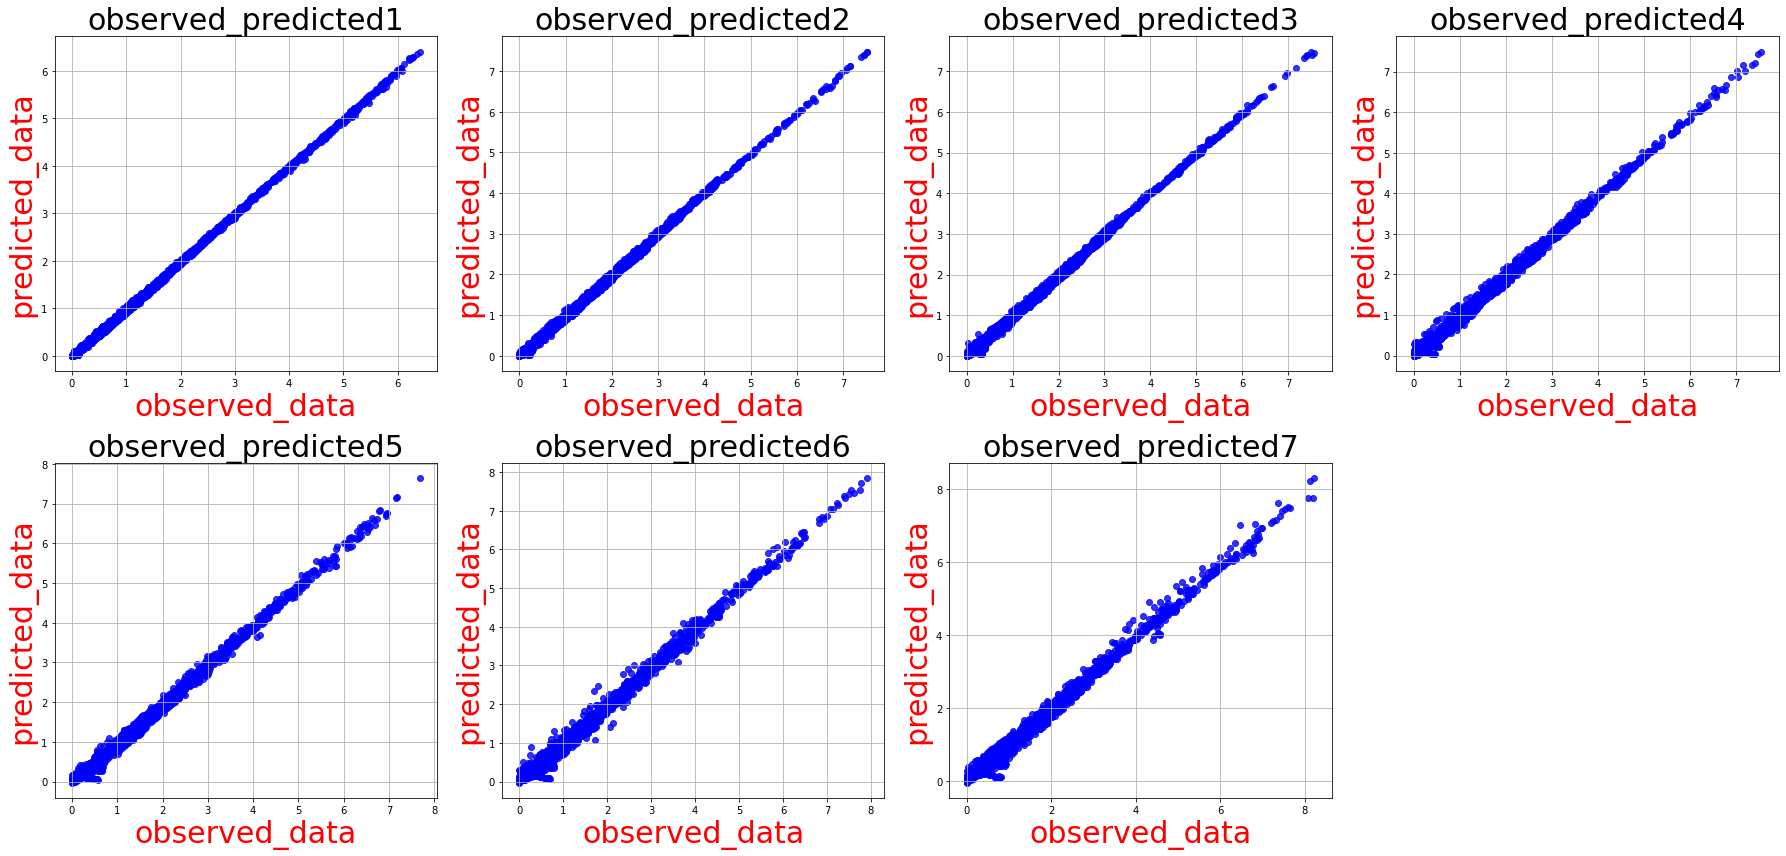

In [ ]:
# Figureを追加
fig = plt.figure(figsize = (25, 12))

# BandGap1 ====================================================================
# 2×4 の1枚目に描画する
yy1 = fig.add_subplot(2, 4, 1)

yy1.scatter(y_test.iloc[:, 0], pred1, c='blue', alpha=0.8)

# グラフ設定
yy1.set_title("observed_predicted1", size = 30)
yy1.grid()
yy1.set_xlabel("observed_data", size = 30, color = "r")
yy1.set_ylabel("predicted_data", size = 30, color = "r")

# BandGap2 ====================================================================
# 2×4 の2枚目に描画する
yy2 = fig.add_subplot(2, 4, 2)

yy2.scatter(y_test.iloc[:, 1], pred2, c='blue', alpha=0.8)

# グラフ設定
yy2.set_title("observed_predicted2", size = 30)
yy2.grid()
yy2.set_xlabel("observed_data", size = 30, color = "r")
yy2.set_ylabel("predicted_data", size = 30, color = "r")

# BandGap3 ====================================================================
# 2×4 の3枚目に描画する
yy3 = fig.add_subplot(2, 4, 3)

yy3.scatter(y_test.iloc[:, 2], pred3, c='blue', alpha=0.8)

# グラフ設定
yy3.set_title("observed_predicted3", size = 30)
yy3.grid()
yy3.set_xlabel("observed_data", size = 30, color = "r")
yy3.set_ylabel("predicted_data", size = 30, color = "r")

# BandGap4 ====================================================================
# 2×4 の3枚目に描画する
yy4 = fig.add_subplot(2, 4, 4)

yy4.scatter(y_test.iloc[:, 3], pred4, c='blue', alpha=0.8)

# グラフ設定
yy4.set_title("observed_predicted4", size = 30)
yy4.grid()
yy4.set_xlabel("observed_data", size = 30, color = "r")
yy4.set_ylabel("predicted_data", size = 30, color = "r")

# BandGap5 ====================================================================
# 2×4 の5枚目に描画する
yy5 = fig.add_subplot(2, 4, 5)

yy5.scatter(y_test.iloc[:, 4], pred5, c='blue', alpha=0.8)

# グラフ設定
yy5.set_title("observed_predicted5", size = 30)
yy5.grid()
yy5.set_xlabel("observed_data", size = 30, color = "r")
yy5.set_ylabel("predicted_data", size = 30, color = "r")

# BandGap6 ====================================================================
# 2×4 の6枚目に描画する
yy6 = fig.add_subplot(2, 4, 6)

yy6.scatter(y_test.iloc[:, 5], pred6, c='blue', alpha=0.8)

# グラフ設定
yy6.set_title("observed_predicted6", size = 30)
yy6.grid()
yy6.set_xlabel("observed_data", size = 30, color = "r")
yy6.set_ylabel("predicted_data", size = 30, color = "r")

# BandGap7 ====================================================================
# 2×4 の7枚目に描画する
yy7 = fig.add_subplot(2, 4, 7)

yy7.scatter(y_test.iloc[:, 6], pred7, c='blue', alpha=0.8)

# グラフ設定
yy7.set_title("observed_predicted7", size = 30)
yy7.grid()
yy7.set_xlabel("observed_data", size = 30, color = "r")
yy7.set_ylabel("predicted_data", size = 30, color = "r")

plt.tight_layout()
plt.show()